### Object Oriented Syntax vs Matlab like Syntax

• A known ‘problem’ with learning matplotlib is, it has two coding interfaces:

    1. Matlab like syntax
    2. Object oriented syntax.
• This is partly the reason why matplotlib doesn’t have one consistent way of achieving the same given output, making it a bit difficult to understand for new comers.

• The syntax you’ve seen so far is the Object-oriented syntax, which I personally prefer and is more intuitive and pythonic to work with.

• However, since the original purpose of matplotlib was to recreate the plotting facilities of matlab in python, the matlab-like-syntax is retained and still works.

• The matlab syntax is ‘stateful’.

• That means, the plt keeps track of what the current axes is. So whatever you draw with plt.{anything} will reflect only on the current subplot.

• Practically speaking, the main difference between the two syntaxes is, in matlab-like syntax, all plotting is done using plt methods instead of the respective axes‘s method as in object oriented syntax.

• So, how to recreate the above multi-subplots figure (or any other figure for that matter) using matlab-like syntax?

• The general procedure is: You manually create one subplot at a time (using plt.subplot() or plt.add_subplot()) and immediately call plt.plot() or plt.{anything} to modify that specific subplot (axes). Whatever method you call using plt will be drawn in the current axes.

• The code below shows this in practice.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

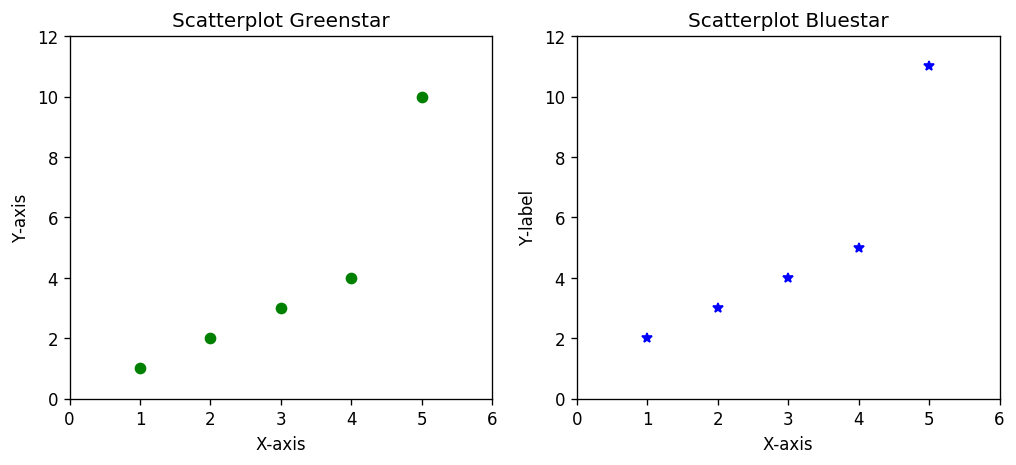

In [2]:
plt.figure(figsize = (10, 4), dpi = 120) # 10 is width, 4 is height

# Lefthand side plot
plt.subplot(1, 2, 1) # (nrows, ncolumns, axes number to the plot)
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], 'go')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0, 6)
plt.ylim(0, 12)
plt.title('Scatterplot Greenstar')

# Righthand side plot
plt.subplot(1, 2, 2)
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], 'b*')
plt.xlabel('X-axis')
plt.ylabel('Y-label')
plt.xlim(0, 6)
plt.ylim(0, 12)
plt.title('Scatterplot Bluestar');

• Let’s breakdown the above piece of code.

• In plt.subplot(1,2,1), the first two values, that is (1,2) specifies the number of rows (1) and columns (2) and the third parameter (1) specifies the position of current subplot.

• The subsequent plt functions, will always draw on this current subplot.

• You can get a reference to the current (subplot) axes with plt.gca() and the current figure with plt.gcf(). Likewise, plt.cla() and plt.clf() will clear the current axes and figure respectively.

• Alright, compare the above code with the object oriented (OO) version. 

• The OO version might look a but confusing because it has a mix of both ax1 and plt commands.

• However, there is a significant advantage with axes approach.

• That is, since plt.subplots returns all the axes as separate objects, you can avoid writing repetitive code by looping through the axes.

• Always remember: plt.plot() or plt.{anything} will always act on the plot in the current axes, whereas, ax.{anything} will modify the plot inside that specific ax.

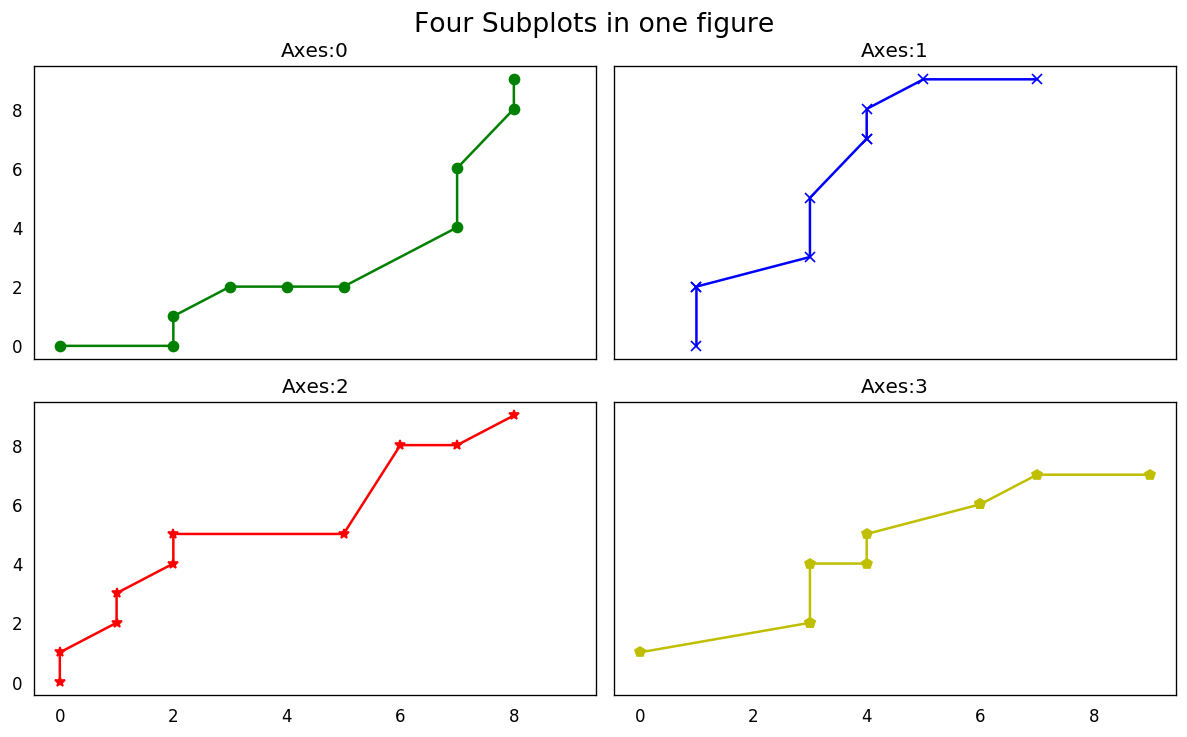

In [12]:
# Import multiple plots using for-loops & object oriented syntex
import numpy as np
from numpy.random import seed, randint
seed(100)

# Create figure & subplots
fig, axes = plt.subplots(2, 2, figsize = (10, 6), sharex = True, sharey = True, dpi = 120)

# Define the colors & markers to use
colors = {0 : 'g', 1 : 'b', 2 : 'r', 3 : 'y'}
markers = {0 : 'o', 1 : 'x', 2 : '*', 3 : 'p'}

# Plot each axes
for i, ax in enumerate(axes.ravel()):
    ax.plot(sorted(randint(0,10,10)), sorted(randint(0,10,10)), marker=markers[i], color=colors[i])
    ax.set_title('Axes:' + str(i))
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

plt.suptitle('Four Subplots in one figure', verticalalignment = 'bottom', fontsize = 16)
plt.tight_layout();

• Did you notice in above plot, the Y-axis does not have ticks?

• That’s because I used ax.yaxis.set_ticks_position('none') to turn off the Y-axis ticks. This is another advantage of the object-oriented interface. You can actually get a reference to any specific element of the plot and use its methods to manipulate it.

• Can you guess how to turn off the X-axis ticks?

• The plt.suptitle() added a main title at figure level title. plt.title() would have done the same for the current subplot (axes).

• The verticalalignment='bottom' parameter denotes the hingepoint should be at the bottom of the title text, so that the main title is pushed slightly upwards.

• Alright, What you’ve learned so far is the core essence of how to create a plot and manipulate it using matplotlib. Next, let’s see how to get the reference to and modify the other components of the plot.